In [ ]:
#introduction

#The global superstore dataset provides a comprehensive glimpse into the retail landscape,encapsulated
#within an extensive excel file.
#this dataset encapsulates a vast array of order-related information, offering insights into 
#retail operations across an impressive 147 countries worldwide.

In [9]:
import pandas as pd
import numpy as np
import seaborn as seabrn
import matplotlib.pyplot as plt
import math as mth
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Downloads\Global_Superstore2.csv",encoding = "cp1252")
print(df)


       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.dtypes


Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['Order Date'])

In [9]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  object        
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
df.set_index('Postal Code', inplace=True)
df1=df.fillna(0)
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,date
Postal Code,,,,,,,,,,,,,,,,,,,,,
10024.0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07-31
NaN,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02-05
NaN,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013-10-17
NaN,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013-01-28
NaN,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,2014-06-19
77095.0,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014-06-20
93030.0,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,2013-12-02


In [11]:
#data description
df.describe()


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,date
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2013-05-11 21:26:49.155781120
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011-01-01 00:00:00
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012-06-19 00:00:00
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013-07-08 00:00:00
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014-05-22 00:00:00
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014-12-31 00:00:00
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,NaN


In [12]:
#checking duplicates
du=df[df.duplicated()]
print("duplicated rows:")
du


duplicated rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,date
Postal Code,,,,,,,,,,,,,,,,,,,,,


In [13]:
df.duplicated(keep=False).sum()

np.int64(0)

In [14]:
#explonatory data analysis
#customer segmentation
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,date
Postal Code,,,,,,,,,,,,,,,,,,,,,
10024.0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07-31
NaN,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02-05
NaN,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013-10-17


In [15]:
#what is overall sales trend
df['Order Date'].min()
df['Order Date'].max()


'31-12-2014'

In [16]:
df.shape

(51290, 24)

In [17]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'date'],
      dtype='object')

In [18]:
df['Category'].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [19]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [20]:
import datetime

In [21]:
df ['Price'] = df ['Sales'] / df ['Quantity']

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,date,Price
Postal Code,,,,,,,,,,,,,,,,,,,,,
10024.0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07-31,329.950
NaN,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02-05,412.155
NaN,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013-10-17,575.019
NaN,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013-01-28,578.502
NaN,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013-11-05,354.120


In [23]:
# 1 What state sold the most product?
df_gpstate = df [['State','Sales']]
grouped_state = df_gpstate.groupby("State").sum().sort_values("Sales", ascending = False).head(10)
grouped_state 

,Sales
State,
England,485170.9710
California,457687.6315
Ile-de-France,317822.5440
New York,310876.2710
New South Wales,270487.1040
Queensland,238312.7340
North Rhine-Westphalia,216451.8510
Texas,170188.0458
San Salvador,153639.3970


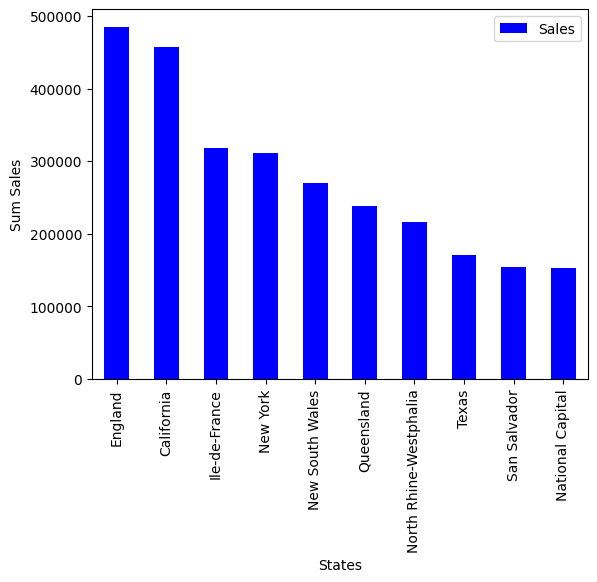

In [24]:
grouped_state.plot.bar (color = "blue")
plt.ylabel ("Sum Sales")
plt.xlabel ("States")
plt.show()

In [25]:
# 2 What city sold the most product?
df_gpcity = df [['City', 'Sales']]
grouped_city = df_gpcity.groupby (['City']).sum().sort_values ('Sales', ascending = False).head (12)
grouped_city

,Sales
City,
New York City,256368.16100
Los Angeles,175851.34100
Manila,120886.94850
Seattle,119540.74200
San Francisco,112669.09200
Philadelphia,109077.01300
Sydney,101945.51700
Jakarta,94321.32420
London,86945.80500


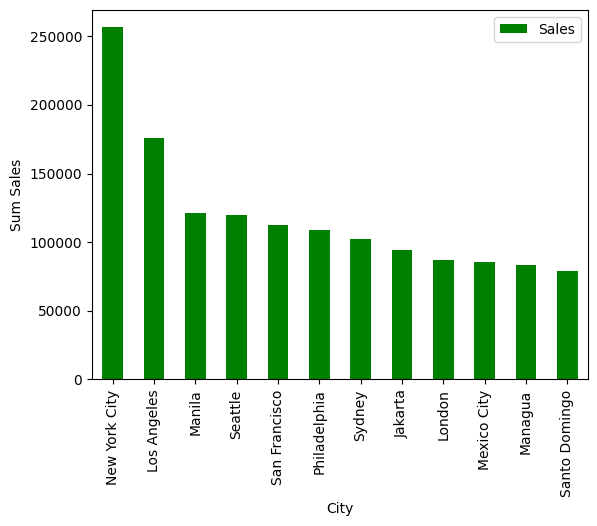

In [27]:
grouped_city.plot.bar (color = "green")
plt.ylabel ("Sum Sales")
plt.xlabel ("City")
plt.show()

In [28]:
# 3 What categories are most often sold togather?
df = df [df['Order ID'].duplicated(keep = False)]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,date,Price
Postal Code,,,,,,,,,,,,,,,,,,,,,
10024.0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07-31,329.950
NaN,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02-05,412.155
NaN,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013-10-17,575.019
NaN,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical,2013-06-28,572.535
NaN,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical,2011-11-07,455.520


In [29]:
df['Grouped'] = df.groupby ('Order ID') ['Category'].transform (lambda x:','.join(x))

In [30]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,date,Price,Grouped
Postal Code,,,,,,,,,,,,,,,,,,,,,
10024.0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07-31,329.950,"Technology,Furniture,Office Supplies"
NaN,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02-05,412.155,"Furniture,Technology,Office Supplies,Technology"
NaN,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013-10-17,575.019,"Technology,Technology,Office Supplies,Office S..."
NaN,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical,2013-06-28,572.535,"Technology,Technology,Technology,Office Suppli..."
NaN,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical,2011-11-07,455.520,"Furniture,Office Supplies"


In [32]:
from itertools import combinations

In [33]:
from collections import Counter

In [32]:
# 4 What category sold the most?
df_gpcategory  = df[['Category', 'Quantity']]
df_gpquantity = df_gpcategory.groupby ("Category").sum().sort_values("Quantity", ascending = False)
df_gpquantity

,Quantity
Category,
Office Supplies,82663
Technology,26978
Furniture,26257


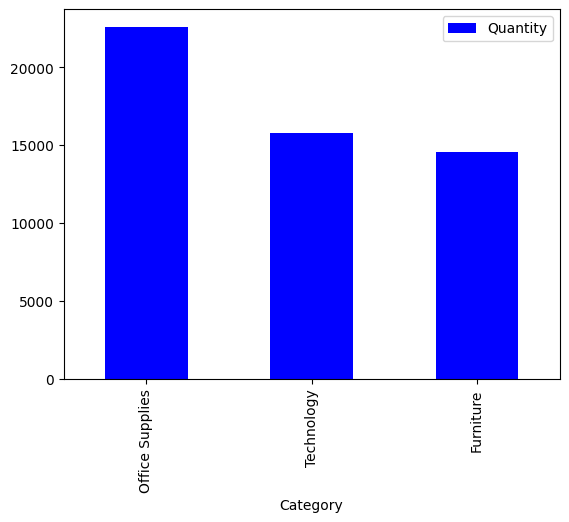

In [112]:
df_gpquantity.plot.bar (color = "blue")
plt.show()

In [41]:
# 5 Which Category is Most Profitable?
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,3.096664e+06,225647.6931,26257
Office Supplies,2.931464e+06,401307.5535,82663
Technology,3.621760e+06,489928.2613,26978


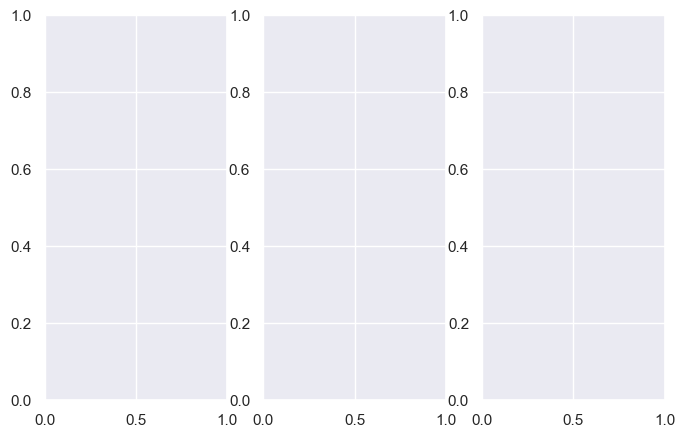

In [38]:
seabrn.set_theme(style="darkgrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

In [12]:

cat1 = seabrn.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = seabrn.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = seabrn.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

In [17]:
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

[Text(0.5, 1.0, 'Quantity')]

In [18]:
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)


[None, None, None, None, None, None]

In [19]:
figure.tight_layout()

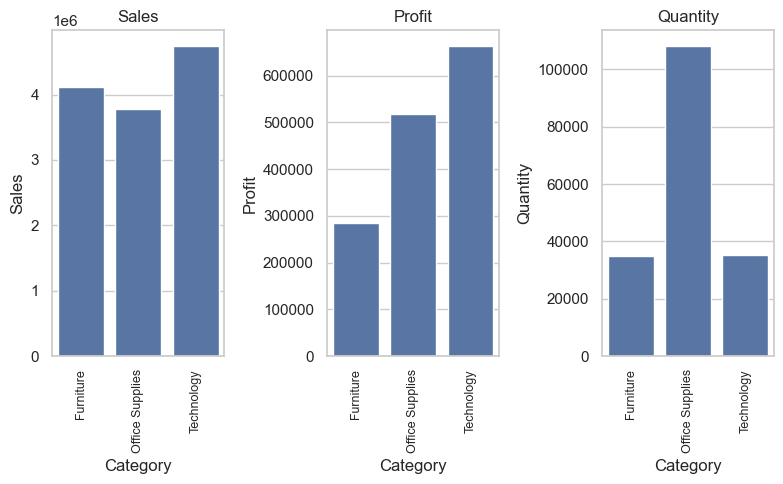

In [20]:
# Set for grouped plots - figure with a 2x2 grid of Axes
seabrn.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = seabrn.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = seabrn.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = seabrn.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()


In [40]:
# 6 What are  Most Profitable Sub-Category?
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [23]:
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,1.706824e+06,216717.00580
Copiers,1.509436e+06,258567.54818
Chairs,1.501682e+06,140396.26750
Bookcases,1.466572e+06,161924.41950
Storage,1.127086e+06,108461.48980
Appliances,1.011064e+06,141680.58940
Machines,7.790601e+05,58867.87300
Tables,7.570419e+05,-64083.38870
Accessories,7.492370e+05,129626.30620


In [24]:
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,1.509436e+06,258567.54818
Phones,1.706824e+06,216717.00580
Bookcases,1.466572e+06,161924.41950
Appliances,1.011064e+06,141680.58940
Chairs,1.501682e+06,140396.26750
Accessories,7.492370e+05,129626.30620
Storage,1.127086e+06,108461.48980
Binders,4.619115e+05,72449.84600
Paper,2.442917e+05,59207.68270


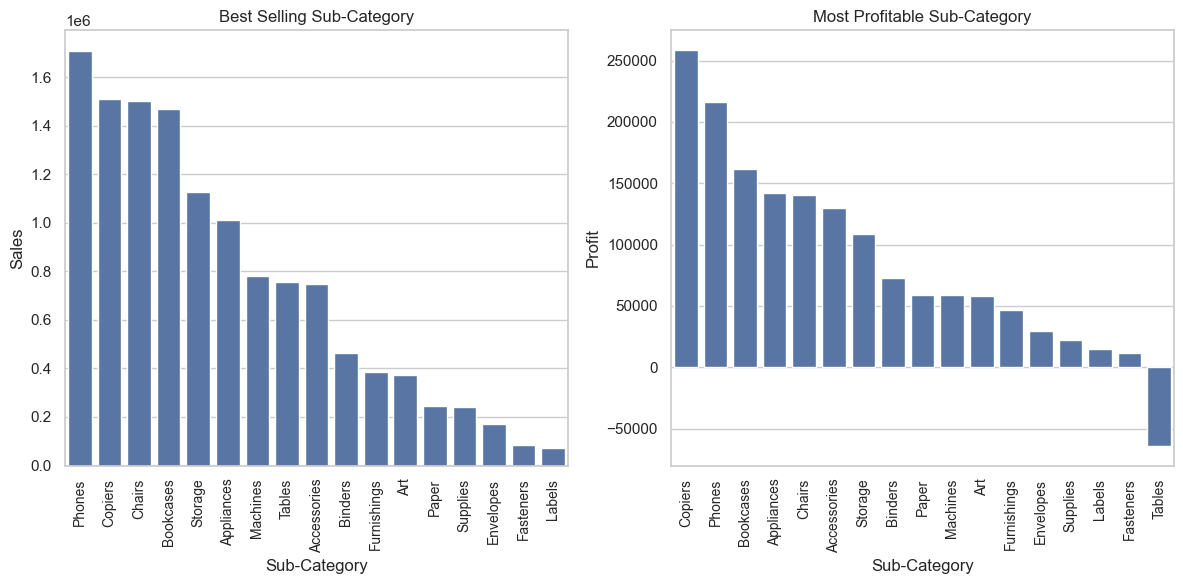

In [25]:
seabrn.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = seabrn.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = seabrn.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

In [42]:
# 7 Which is the Top Selling Sub-Category?
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,16605
Storage,12900
Art,12406
Paper,9694
Chairs,9134
Phones,9029
Accessories,8481
Furnishings,8408
Labels,6987


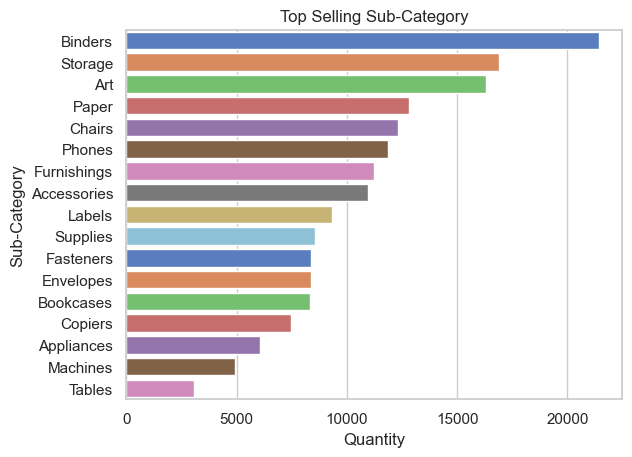

In [28]:
# Plot Bar Plot for Top Selling Sub-Category
seabrn.set_theme(style="whitegrid")
seabrn.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

In [43]:
#8 Which Customer Segment is Most Profitable?
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,549844.88606
Corporate,355150.57030
Home Office,211888.05154


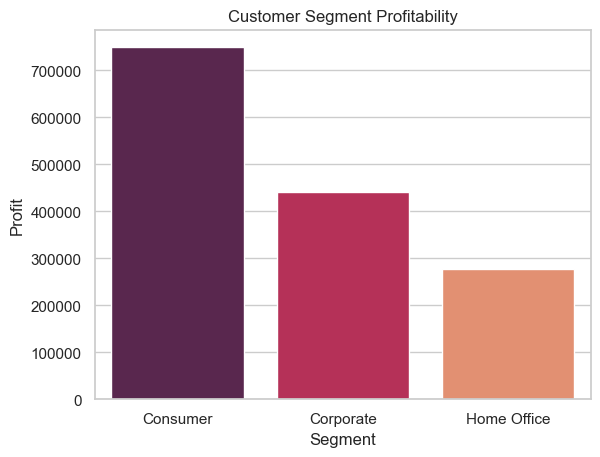

In [30]:
# Plot Bar Plot
seabrn.set_theme(style="whitegrid")
seabrn.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

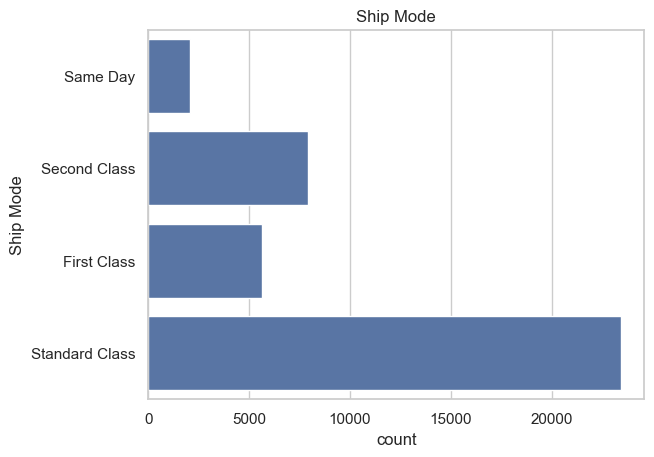

In [44]:
#9 Which is the Preferred Ship Mode?
# Plot shipment mode
seabrn.set_theme(style="whitegrid")
seabrn.countplot(df['Ship Mode'])
plt.title("Ship Mode")
plt.show()

In [5]:
#10 Which Region is the Most Profitable?
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Africa,88871.63100
1,Canada,17817.39000
2,Caribbean,34571.32104
3,Central,311403.98164
4,Central Asia,132480.18700
5,EMEA,43897.97100
6,East,91522.78000
7,North,194597.95252
8,North Asia,165578.42100
9,Oceania,120089.11200


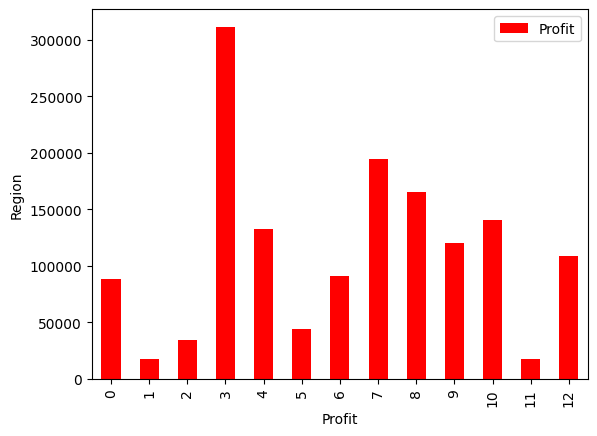

In [10]:
region_analysis.plot.bar (color = "red")
plt.ylabel ("Region")
plt.xlabel ("Profit")
plt.show()

In [8]:
#Overall Analysis
#The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
#It is better to give more discounts during festival seasons, additionally, that will result in more sales.
#The Home office segment needs better improvement.
#Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.
 

#Conclusion
#–> We have learned how to perform Exploratory Data Analysis.

#–> We performed it by using the sample superstore dataset.

#–>We have seen the loss areas in it and have seen some measures to overcome them.

#–> We have seen visualizations and drawn conclusions.